In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../datasets/iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [146]:
desc = data.describe()
desc

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


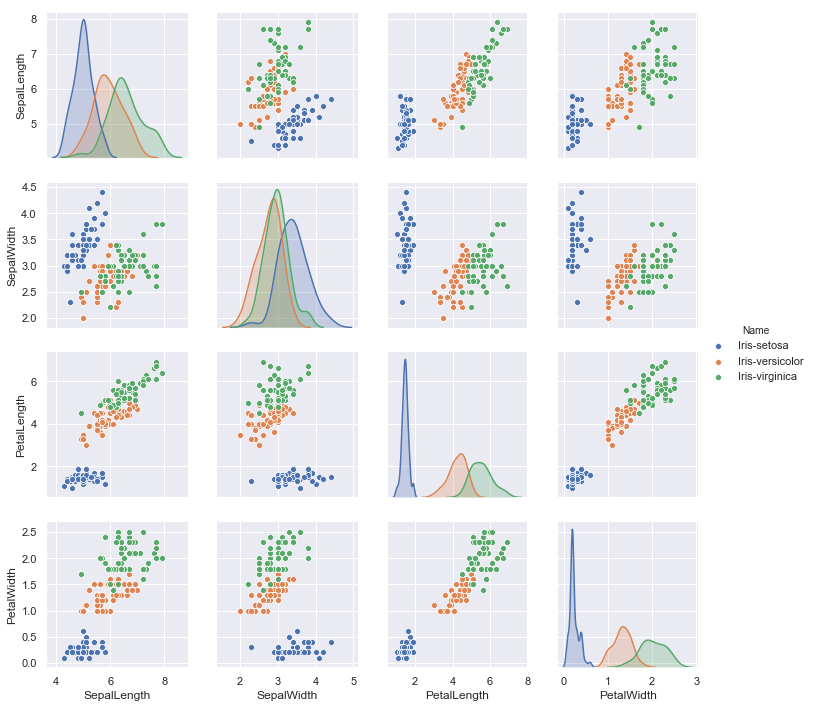

In [103]:
# scatter plot
sns.set()
sns.pairplot(data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name']], hue="Name", diag_kind="kde")

In [129]:
def manhattanDistance(left, right, length):
    
    distance = 0
    for i in range(length):
        distance += abs(left[i] - right[i])
    return distance

In [3]:
def euclideanDistance(left, right, length):
    
    distance= 0
    for i in range(length):
        distance += np.square(left[i] - right[i])
    return np.sqrt(distance)

In [133]:

def KNN(trainingSet, testInstance, k):
        
    length = testInstance.shape[0] # feature length
    distances = {}
    
    # distance between testInstance and each trainingSet
    for i in range(len(trainingSet)):
        
#         dist = manhattanDistance(testInstance, trainingSet.iloc[i], length)
        dist = euclideanDistance(testInstance, trainingSet.iloc[i], length)
        
        distances[i] = dist
        
    
    sorted_d = sorted(distances.items(), key=lambda kv: kv[1])
    
    # get k neighbors closest to the testInstance
    neighbors = []
    
    for i in range(k):
        neighbors.append(sorted_d[i][0])
    
    # count of classes among neighbors
    classVotes = {}
    
    for x in range(len(neighbors)):
        
        class_label = trainingSet.iloc[neighbors[x]][-1]
        
        if class_label in classVotes:
            classVotes[class_label] += 1
        else:
            classVotes[class_label] = 1
            
    sorted_v = sorted(classVotes.items(), key=lambda kv: kv[1], reverse=True)
    
    return (sorted_v[0][0], neighbors)

In [48]:
def load_iris2():
    data = pd.read_csv('../datasets/iris.csv')
    
    idx = list(range(len(data)))
    
    np.random.seed(7382)
    np.random.shuffle(idx)
    
    train_size = int(0.77 * data.shape[0])
    test_size = data.shape[0] - train_size
    
    train_idx = idx[:train_size] 
    test_idx = idx[train_size:]
    
    train = data.iloc[train_idx]
    test = data.iloc[test_idx]
    
    return (train, test)

In [131]:
def KNearestNeighbor(trainingSet, testSet, k):
    
    test_len = testSet.shape[0]
    
    correct = 0
    for i in range(test_len):
        
        result, neighbors = KNN(trainingSet, testSet.iloc[i][:-1], k)
        if result == testSet.iloc[i]['Name']:
            correct += 1
        else :
            print('Error ******************************************* ', end=" ")
        print('For tuple {}; correct label is {}; predicted lable is {} '.format(i, testSet.iloc[i]['Name'], result))
    
    print('Total correct {} out of {} '.format(correct, test_len))
    print('accuracy: {}% '.format((correct / test_len) * 100))

In [143]:
train, test = load_iris2()
KNearestNeighbor(train, test, 1)

For tuple 0; correct label is Iris-setosa; predicted lable is Iris-setosa 
For tuple 1; correct label is Iris-setosa; predicted lable is Iris-setosa 
For tuple 2; correct label is Iris-virginica; predicted lable is Iris-virginica 
For tuple 3; correct label is Iris-setosa; predicted lable is Iris-setosa 
Error *******************************************  For tuple 4; correct label is Iris-virginica; predicted lable is Iris-versicolor 
For tuple 5; correct label is Iris-setosa; predicted lable is Iris-setosa 
For tuple 6; correct label is Iris-virginica; predicted lable is Iris-virginica 
For tuple 7; correct label is Iris-virginica; predicted lable is Iris-virginica 
For tuple 8; correct label is Iris-setosa; predicted lable is Iris-setosa 
For tuple 9; correct label is Iris-setosa; predicted lable is Iris-setosa 
For tuple 10; correct label is Iris-virginica; predicted lable is Iris-virginica 
For tuple 11; correct label is Iris-virginica; predicted lable is Iris-virginica 
For tuple 

In [141]:
# varying the value of k

list_k = [1, 3, 5, 10, 20, 50, 100]
def test_for_k(train, test):
    
    accuracy = []
    for k in list_k:
        test_len = test.shape[0]
    
        correct = 0
        for i in range(test_len):
        
            result, neighbors = KNN(train, test.iloc[i][:-1], k)
            if result == test.iloc[i]['Name']:
                correct += 1
                
        accuracy.append(correct / test_len)
    
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.plot(list_k, accuracy)
    

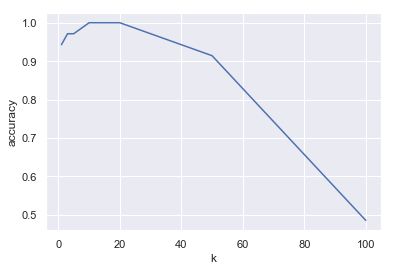

In [144]:
test_for_k(train, test)

In [151]:
# normalize data
def normalize(df):
    result = df.copy()
    
    for feature_name in df.columns:
        
        if feature_name != 'Name':
            mean = df[feature_name].mean()
            sd = df[feature_name].std()
            result[feature_name] = (df[feature_name] - mean) / sd
    return result

In [153]:
test = normalize(test)
train = normalize(train)

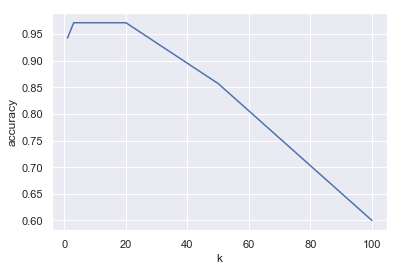

In [158]:
# after normalization
test_for_k(train, test)
# KNearestNeighbor(train, test, 3)

In [108]:
# testSet = [[7.2, 3.6, 5.1, 2.5]]
# test = pd.DataFrame(testSet)
# len(test)

In [104]:
# k = 1
# result, neighbors = KNN(data, test, k)

# print(result)

In [107]:
# k = 3
# result, neighbors = KNN(data, test, k)

# print("result = " + result)
# print("neighbors = " + str([data.iloc[x][-1] for x in neighbors]))

In [8]:

# class NearestNeighbor():
    
#     def __init__(self):
#         pass
    
#     def train(self, X, y):
        
#         # TODO represent the data using kdtree
#         self.Xtr = X # size = N * D
#         self.ytr = y # size = N
    
#     def predict(self, X):
        
#         test_count = X.shape[0]
#         Ypred = np.zeros(test_count, dtype=self.ytr.dtype)
        
#         for i in range(test_count):
            
#             distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
#             min_index = np.argmin(distances)
#             Ypred[i] = self.ytr[min_index]
            
#         return Ypred

In [9]:
# def load_iris():
#     data = pd.read_csv('../datasets/iris.csv')
#     data_np = data.values
    
#     idx = list(range(len(data_np)))
    
#     np.random.seed(7382)
#     np.random.shuffle(idx)
    
#     train_size = int(0.77 * data_np.shape[0])
#     test_size = data_np.shape[0] - train_size
    
#     train_idx = idx[:train_size] 
#     test_idx = idx[train_size:]
    
#     Xtr_rows = data_np[train_idx, :-1].reshape(train_size, -1).astype(float)
#     Ytr = data_np[train_idx, -1].reshape(train_size, -1)
    
#     Xte_rows = data_np[test_idx, :-1].reshape(test_size, -1).astype(float)
#     Yte = data_np[test_idx, -1].reshape(test_size, -1)
    
#     return (Xtr_rows, Ytr, Xte_rows, Yte)

# # load_iris()

In [21]:
# Xtr_rows, Ytr, Xte_rows, Yte = load_iris()

# # print(Xtr_rows[:5])

In [105]:
# nn = NearestNeighbor()
# nn.train(Xtr_rows, Ytr)
# Yte_predict = nn.predict(Xte_rows)

# print("accuracy: {} ".format(np.mean(Yte_predict == Yte)))

In [106]:
# print(Xte_rows[14])
# print(Yte[14])
# nn.predict(Xte_rows[14:15])